In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Salary Data.csv")

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df.shape

(375, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [7]:
# Checking for null values in the data
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [8]:
# Drop rows where target value is missing
df = df[df['Salary'].notnull()].copy()

# Fill missing numerical values with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)

# Fill missing categorical values with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)
df['Job Title'].fillna(df['Job Title'].mode()[0], inplace=True)


C:\Users\saksh\AppData\Local\Temp\ipykernel_29648\2616074969.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_29648\2616074969.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [9]:
# Checking  again for null values in the data
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:
# checking for any duplicate rows
df.duplicated().sum()

np.int64(49)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# # checking for again any duplicate rows
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(324, 6)

In [14]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [15]:
labels1= df['Gender'].unique()

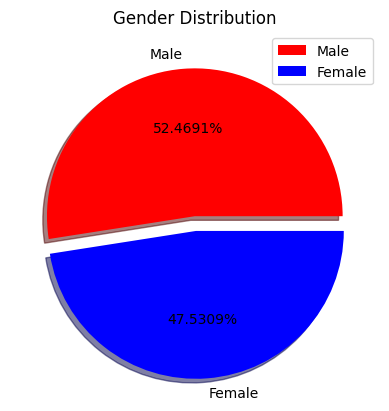

In [16]:
# pie chart
plt.pie(df["Gender"].value_counts(),labels=labels1,autopct="%1.4f%%",shadow=True,colors=["red","blue"],explode=[0,0.1])
plt.legend()
plt.title("Gender Distribution")
plt.show()

Text(0.5, 1.0, 'Salary Distribution (INR/year)')

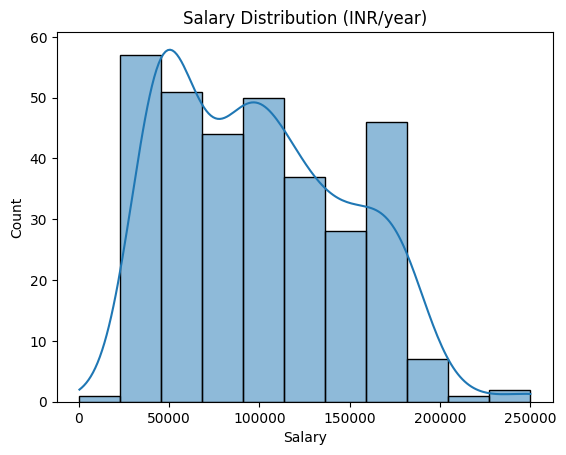

In [17]:
sns.histplot(data=df, x='Salary', kde=True)
plt.title('Salary Distribution (INR/year)')


In [18]:
# Encode the categorical data into numerical data

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# For non-ordinal (Gender, Job Title, Education Level)
ohe = OneHotEncoder(sparse_output=False, drop='first')
non_ordinal_cols = ['Gender', 'Education Level', 'Job Title']
ohe_data = ohe.fit_transform(df[non_ordinal_cols])

In [19]:
ohe_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]], shape=(324, 176))

In [20]:
# Convert encoded array to DataFrame
encoded_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(non_ordinal_cols))

# Reset index to align with original dataframe
encoded_df.reset_index(drop=True, inplace=True)

In [21]:
 #  Extract numerical columns and reset index
numerical_df = df[['Age', 'Years of Experience']].reset_index(drop=True)

In [22]:
numerical_df

,Age,Years of Experience
0,32.0,5.0
1,28.0,3.0
2,45.0,15.0
3,36.0,7.0
4,52.0,20.0
...,...,...
319,28.0,1.0
320,36.0,8.0
321,44.0,16.0
322,31.0,3.0


In [23]:
# Concatenate numerical + encoded data

x= pd.concat([numerical_df, encoded_df], axis=1)


In [24]:
# Extract the target variable (e.g. Salary)
y = df['Salary']

In [25]:
x.head()

,Age,Years of Experience,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45.0,15.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
print(x.dtypes)

Age                           float64
Years of Experience           float64
Gender_Male                   float64
Education Level_Master's      float64
Education Level_PhD           float64
                               ...   
Job Title_UX Designer         float64
Job Title_UX Researcher       float64
Job Title_VP of Finance       float64
Job Title_VP of Operations    float64
Job Title_Web Developer       float64
Length: 178, dtype: object


In [27]:
y.dtypes

dtype('float64')

In [28]:
x.shape

(324, 178)

In [29]:
y.shape

(324,)

In [30]:
# Splitting the data into train and test samples
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [31]:
# Train a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
# Make Predictions and Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = rf_model.predict(x_test)

# Evaluation metrics

# Mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"📉MAE: {mae:.2f}")

# Mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"📉MSE: {mse:.2f}")

# Root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"📉 RMSE: {rmse:.2f}")

# R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"📈R² Score: {r2:.2f}")

📉MAE: 10178.78
📉MSE: 223764226.09
📉 RMSE: 14958.75
📈R² Score: 0.88


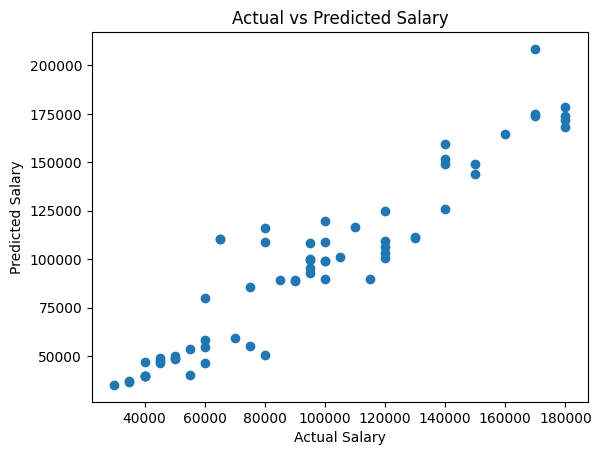

In [33]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


In [34]:
# Features
import pandas as pd

importances = rf_model.feature_importances_
feature_names = x.columns

# Create DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))  # Top 10 important features


                                Feature  Importance
1                   Years of Experience    0.562236
0                                   Age    0.334519
4                   Education Level_PhD    0.011995
3              Education Level_Master's    0.010801
11         Job Title_Chief Data Officer    0.006259
6    Job Title_Administrative Assistant    0.005389
12   Job Title_Chief Technology Officer    0.003665
102                 Job Title_Recruiter    0.003273
10                        Job Title_CEO    0.003103
33      Job Title_Director of Marketing    0.002490


In [35]:
# save the model to a .pkl file
import joblib
joblib.dump(rf_model, "rf_salary_model_2.pkl")

['rf_salary_model_2.pkl']

In [36]:
 # Save OneHotEncoder
joblib.dump(ohe, 'C:\\Users\\saksh\\OneDrive\\Desktop\\Salary_Prediction\\encoder_2.pkl')


['C:\\Users\\saksh\\OneDrive\\Desktop\\Salary_Prediction\\encoder_2.pkl']

In [37]:
# Save Features columns
joblib.dump(x.columns.tolist(), 'C:\\Users\\saksh\\OneDrive\\Desktop\\Salary_Prediction\\rf_features_2.pkl')



['C:\\Users\\saksh\\OneDrive\\Desktop\\Salary_Prediction\\rf_features_2.pkl']